In [1]:
import numpy as np
import pandas as pd
from glob import glob
import os

In [2]:
s_cand = pd.read_pickle('../dataframes/galaxy_frames/s_candidates.pkl')
n_cand = pd.read_pickle('../dataframes/galaxy_frames/n_candidates.pkl')
s_cand_sup= pd.read_pickle('../dataframes/galaxy_frames/s_sup_candidates.pkl')
n_cand_sup= pd.read_pickle('../dataframes/galaxy_frames/n_sup_candidates.pkl')
u_cand= pd.read_pickle('../dataframes/galaxy_frames/u_candidates.pkl')

In [3]:
s_cand = pd.concat([s_cand,s_cand_sup]).sort_values('gids')
n_cand = pd.concat([n_cand,n_cand_sup]).sort_values('gids')

In [8]:
len(n_cand)

96

In [9]:
for i in range(len(s_cand)):
    slrm_text= ["#!/bin/bash\n#SBATCH -J g_beam-{0}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o gbeam{0}-%j.out\n\
#SBATCH -e gbeam{0}-%j.err\n\nchmod a+x C_beams_instruct.py\n\n\
python C_beams_instruct.py {1} 'south' {2} {3} &\npython C_beams_instruct.py {4} 'north' {5} {6} &\n\
    \nwait\n\nexit 0".format(i + 1, s_cand.gids[s_cand.index[i]],s_cand.ra[s_cand.index[i]],s_cand.dec[s_cand.index[i]],
                            n_cand.gids[n_cand.index[i]],n_cand.ra[n_cand.index[i]],n_cand.dec[n_cand.index[i]])]

    np.savetxt('../cluster_scripts/gen_beam_{0}.slrm'.format(i + 1), slrm_text, fmt='%s')

In [10]:
i

68

In [11]:
for i in range(len(u_cand)):
    slrm_text= ["#!/bin/bash\n#SBATCH -J g_beam-{0}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o gbeam{0}-%j.out\n\
#SBATCH -e gbeam{0}-%j.err\n\nchmod a+x C_beams_instruct.py\n\n\
python C_beams_instruct.py {1} 'uds' {2} {3} &\npython C_beams_instruct.py {4} 'north' {5} {6} &\n\
    \nwait\n\nexit 0".format(i + 69+ 1, u_cand.gids[u_cand.index[i]],u_cand.ra[u_cand.index[i]],u_cand.dec[u_cand.index[i]],
                            n_cand.gids[n_cand.index[i+ 69]],n_cand.ra[n_cand.index[i+ 69]],n_cand.dec[n_cand.index[i+ 69]])]

    np.savetxt('../cluster_scripts/gen_beam_{0}.slrm'.format(i + 69 + 1), slrm_text, fmt='%s')

In [14]:
for i in range(len(n_cand)-84):
    slrm_text= ["#!/bin/bash\n#SBATCH -J g_beam-{0}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o gbeam{0}-%j.out\n\
#SBATCH -e gbeam{0}-%j.err\n\nchmod a+x C_beams_instruct.py\n\n\
python C_beams_instruct.py {1} 'north' {2} {3} &\n\nwait\n\nexit 0".format(i + 84+ 1, n_cand.gids[n_cand.index[i+ 84]],n_cand.ra[n_cand.index[i+ 84]],n_cand.dec[n_cand.index[i+ 84]])]

    np.savetxt('../cluster_scripts/gen_beam_{0}.slrm'.format(i + 84 + 1), slrm_text, fmt='%s')

In [12]:
len(n_cand)-84

12

In [24]:
slrm_text= ["#!/bin/bash\n#SBATCH -J g_beam-{0}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o gbeam{0}-%j.out\n\
#SBATCH -e gbeam{0}-%j.err\n\nchmod a+x C_beams_instruct.py\n\npython C_beams_instruct.py {1} 'south' {2} {3} &\n\nwait\n\nexit 0".format(17, s_cand.gids[s_cand.index[16]],s_cand.ra[s_cand.index[16]],s_cand.dec[s_cand.index[16]])]

np.savetxt('../cluster_scripts/gen_beam_{0}.slrm'.format(17), slrm_text, fmt='%s')

In [25]:
slrm_text= ["#!/bin/bash\n#SBATCH -J g_beam-{0}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o gbeam{0}-%j.out\n\
#SBATCH -e gbeam{0}-%j.err\n\nchmod a+x C_beams_instruct.py\n\npython C_beams_instruct.py {1} 'south' {2} {3} &\n\nwait\n\nexit 0".format(18, s_cand.gids[s_cand.index[17]],s_cand.ra[s_cand.index[17]],s_cand.dec[s_cand.index[17]])]

np.savetxt('../cluster_scripts/gen_beam_{0}.slrm'.format(18), slrm_text, fmt='%s')

# Make Redshift Fitting files

In [16]:
for i in range(int(len(s_cand)/4)):
    slrm_text= ["#!/bin/bash\n#SBATCH -J zfit-{0}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o zfit{0}-%j.out\n\
#SBATCH -e zfit{0}-%j.err\n\nchmod a+x C_zfit_beam_instruct.py\n\n\
python C_zfit_beam_instruct.py '{1}' {5} &\npython C_zfit_beam_instruct.py '{2}' {5} &\n\
python C_zfit_beam_instruct.py '{3}' {5} &\n\
python C_zfit_beam_instruct.py '{4}' {5} &\n\
\nwait\n\nexit 0".format(i + 1, s_cand.gids[s_cand.index[4*i + 0]], s_cand.gids[s_cand.index[4*i + 1]], 
                             s_cand.gids[s_cand.index[4*i + 2]], s_cand.gids[s_cand.index[4*i + 3]],'gs')]

    np.savetxt('../cluster_scripts/beam_zfit_{0}.slrm'.format(i + 1), slrm_text, fmt='%s')    

In [ ]:
for i in range(int(len(n_cand)/4)):
    slrm_text= ["#!/bin/bash\n#SBATCH -J zfit-{0}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o zfit{0}-%j.out\n\
#SBATCH -e zfit{0}-%j.err\n\nchmod a+x C_zfit_beam_instruct.py\n\n\
python C_zfit_beam_instruct.py '{1}' {5} &\npython C_zfit_beam_instruct.py '{2}' {5} &\n\
python C_zfit_beam_instruct.py '{3}' {5} &\n\
python C_zfit_beam_instruct.py '{4}' {5} &\n\
\nwait\n\nexit 0".format(i + 1, n_cand.gids[n_cand.index[4*i + 0]], n_cand.gids[n_cand.index[4*i + 1]], 
                             n_cand.gids[n_cand.index[4*i + 2]], n_cand.gids[n_cand.index[4*i + 3]],'gn')]

    np.savetxt('../cluster_scripts/beam_zfit_{0}.slrm'.format(i + 1), slrm_text, fmt='%s')    

In [ ]:
for i in range(int(len(u_cand)/4)):
    slrm_text= ["#!/bin/bash\n#SBATCH -J zfit-{0}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o zfit{0}-%j.out\n\
#SBATCH -e zfit{0}-%j.err\n\nchmod a+x C_zfit_beam_instruct.py\n\n\
python C_zfit_beam_instruct.py '{1}' {5} &\npython C_zfit_beam_instruct.py '{2}' {5} &\n\
python C_zfit_beam_instruct.py '{3}' {5} &\n\
python C_zfit_beam_instruct.py '{4}' {5} &\n\
\nwait\n\nexit 0".format(i + 1, u_cand.gids[u_cand.index[4*i + 0]], u_cand.gids[u_cand.index[4*i + 1]], 
                             u_cand.gids[u_cand.index[4*i + 2]], u_cand.gids[u_cand.index[4*i + 3]],'uds')]

    np.savetxt('../cluster_scripts/beam_zfit_{0}.slrm'.format(i + 1), slrm_text, fmt='%s')    

In [18]:
len(s_cand) - int(len(s_cand)/4) *4 , len(n_cand) - int(len(n_cand)/4) *4 , len(u_cand) - int(len(u_cand)/4) *4  

(1, 0, 3)

In [11]:
slrm_text= ["#!/bin/bash\n#SBATCH -J zfit-{0}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o zfit{0}-%j.out\n\
#SBATCH -e zfit{0}-%j.err\n\nchmod a+x C_zfit_beam_instruct.py\n\n\
python C_zfit_beam_instruct.py '{1}' {2} &\n\nwait\n\nexit 0".format(i + 1, s_cand.gids[s_cand.index[-1]],,'gs')]

np.savetxt('../cluster_scripts/beam_zfit_{0}.slrm'.format(i + 1), slrm_text, fmt='%s')    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


In [ ]:
slrm_text= ["#!/bin/bash\n#SBATCH -J zfit-{0}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o zfit{0}-%j.out\n\
#SBATCH -e zfit{0}-%j.err\n\nchmod a+x C_zfit_beam_instruct.py\n\n\
python C_zfit_beam_instruct.py '{1}' {4} &\npython C_zfit_beam_instruct.py '{2}' {4} &\n\
python C_zfit_beam_instruct.py '{3}' {4} &\n\
\nwait\n\nexit 0".format(i + 1, u_cand.gids[u_cand.index[-1]], u_cand.gids[u_cand.index[-2]], 
                             u_cand.gids[u_cand.index[-3]], 'uds')]

    np.savetxt('../cluster_scripts/beam_zfit_{0}.slrm'.format(i + 1), slrm_text, fmt='%s') 

In [2]:
galDB = pd.read_pickle('../dataframes/galaxy_database.pkl')

In [3]:
for i in galDB.index:
    slrm_text= ["#!/bin/bash\n#SBATCH -J zfit-{0}\n#SBATCH -p background\n#SBATCH --time=20:00:00\n#SBATCH --mem-per-cpu=64000\n#SBATCH -o zfit{0}-%j.out\n\
#SBATCH -e zfit{0}-%j.err\n\nchmod a+x C_rshift_fit_instruct.py\n\n\
python C_rshift_fit_instruct.py '{1}' {2} {3} &\n\
\nwait\n\nexit 0".format(i + 1, galDB.field[i], galDB.ids[i], galDB.z_lres[i])]

    np.savetxt('../cluster_scripts/rshift_fit_{0}.slrm'.format(i + 1), slrm_text, fmt='%s')    

In [6]:
print(slrm_text[0])

#!/bin/bash
#SBATCH -J zfit-35
#SBATCH -p background
#SBATCH --time=20:00:00
#SBATCH --mem-per-cpu=64000
#SBATCH -o zfit35-%j.out
#SBATCH -e zfit35-%j.err

chmod a+x C_rshift_fit_instruct.py

python C_rshift_fit_instruct.py 'GSD' 48464 &

wait

exit 0


In [5]:
for i in galDB.index:
    slrm_text= ["#!/bin/bash\n#SBATCH -J zfit-{0}\n#SBATCH -p background\n#SBATCH --time=20:00:00\n#SBATCH --mem-per-cpu=64000\n#SBATCH -o zfit{0}-%j.out\n\
#SBATCH -e zfit{0}-%j.err\n\nchmod a+x C_full_fit_instruct.py\n\n\
python C_full_fit_instruct.py '{1}' {2} {3} &\n\
\nwait\n\nexit 0".format(i + 1, galDB.field[i], galDB.ids[i], galDB.z_grism[i])]

    np.savetxt('../cluster_scripts/full_fit_{0}.slrm'.format(i + 1), slrm_text, fmt='%s')    

In [3]:
BFs = pd.read_pickle('../dataframes/BF_fit_all.pkl')

In [52]:
bfZ, bfd, bft, bftau, bfz, gids = [[],[],[],[],[],[]]

for i in BFs.index:
    bfZ.append(BFs.bfZ[i])
    bft.append(BFs.bft[i])
    bftau.append(BFs.bftau[i])
    bfz.append(np.round(BFs.bfz[i],3))
    bfd.append(np.round(BFs.bfd[i],1))
    gids.append(int(BFs.gids[i]))
    
bfZ = np.array(bfZ)
bft = np.array(bft)
bftau = np.array(bftau)
bfz = np.array(bfz)
bfd = np.array(bfd)
gids = np.array(gids)

In [55]:
for i in galDB.index:
    slrm_text= ["#!/bin/bash\n#SBATCH -J ffit-{0}\n#SBATCH -p background\n#SBATCH --time=20:00:00\n#SBATCH --mem-per-cpu=64000\n#SBATCH -o ffit{0}-%j.out\n\
#SBATCH -e ffit{0}-%j.err\n\nchmod a+x C_full_fit_instruct3.py\n\n\
python C_full_fit_instruct3.py '{1}' {2} {3} {4} {5} {6} {7} {8} &\n\
\nwait\n\nexit 0".format(i + 1, galDB.field[i], galDB.ids[i], np.round(galDB.z_grism[i],3),
                        bfZ[gids == galDB.ids[i]][0], bft[gids == galDB.ids[i]][0],bftau[gids == galDB.ids[i]][0],
                        bfz[gids == galDB.ids[i]][0], bfd[gids == galDB.ids[i]][0])]

    np.savetxt('../cluster_scripts/full_fit_set_{0}.slrm'.format(i + 1), slrm_text, fmt='%s')   

In [54]:
print(slrm_text[0])

#!/bin/bash
#SBATCH -J zfit-35
#SBATCH -p background
#SBATCH --time=20:00:00
#SBATCH --mem-per-cpu=64000
#SBATCH -o zfit35-%j.out
#SBATCH -e zfit35-%j.err

chmod a+x C_full_fit_instruct.py

python C_full_fit_instruct.py 'GSD' 48464 2.173 0.002 4.1 8.78 2.173 0.8 &

wait

exit 0


In [2]:
gsd_cat = pd.read_pickle('../dataframes/GS_snr.pkl')
gnd_cat = pd.read_pickle('../dataframes/GN_snr.pkl')

In [9]:
idx = 1

for i in gsd_cat.index:
    slrm_text= ["#!/bin/bash\n#SBATCH -J zit-{0}\n#SBATCH -p background\n#SBATCH --time=2:00:00\n#SBATCH --mem-per-cpu=16000\n#SBATCH -o zfit{0}-%j.out\n\
#SBATCH -e zfit{0}-%j.err\n\nchmod a+x redshift_fit.py\n\n\
python redshift_fit.py 'GSD' {1} &\n\
\nwait\n\nexit 0".format(idx, gsd_cat.id[i])]
    np.savetxt('../cluster_scripts/rshift_fit_{0}.slrm'.format(idx), slrm_text, fmt='%s')   
    idx +=1

for i in gnd_cat.index:
    slrm_text= ["#!/bin/bash\n#SBATCH -J zit-{0}\n#SBATCH -p background\n#SBATCH --time=2:00:00\n#SBATCH --mem-per-cpu=16000\n#SBATCH -o zfit{0}-%j.out\n\
#SBATCH -e zfit{0}-%j.err\n\nchmod a+x redshift_fit.py\n\n\
python redshift_fit.py 'GND' {1} &\n\
\nwait\n\nexit 0".format(idx, gnd_cat.id[i])]
    np.savetxt('../cluster_scripts/rshift_fit_{0}.slrm'.format(idx), slrm_text, fmt='%s')   
    idx +=1


In [16]:
snr_cat = pd.read_pickle('../dataframes/high_snr_df.pkl')

In [17]:
idx = 1
for i in snr_cat.index:
    slrm_text= ["#!/bin/bash\n#SBATCH -J bfit-{0}\n#SBATCH -p background\n#SBATCH --time=8:00:00\n#SBATCH --mem-per-cpu=32000\n#SBATCH -o bfit{0}-%j.out\n\
#SBATCH -e bfit{0}-%j.err\n\nchmod a+x bestfit.py\n\n\
python bestfit.py {1} {2} {3} &\n\
\nwait\n\nexit 0".format(idx, snr_cat.field[i],snr_cat.id[i], np.round(snr_cat.z[i],4))]
    np.savetxt('../cluster_scripts/bestfit_{0}.slrm'.format(idx), slrm_text, fmt='%s')   
    idx +=1


In [12]:
print(slrm_text[0])

#!/bin/bash
#SBATCH -J bfit-61
#SBATCH -p background
#SBATCH --time=2:00:00
#SBATCH --mem-per-cpu=16000
#SBATCH -o bfit61-%j.out
#SBATCH -e bfit61-%j.err

chmod a+x bestfit.py

python bestfit.py GSD 35774 1.2533 &

wait

exit 0


In [13]:
flist = glob('../data/bestfits/*Bfit.npy')

field = [os.path.basename(U).split('_')[0] for U in flist]
galaxy = np.array([os.path.basename(U).split('_')[1] for U in flist]).astype(np.int)

In [3]:
from dynesty.utils import quantile as _quantile
from scipy.ndimage import gaussian_filter as norm_kde

def Get_posterior(sample,logwt,logz):
    weight = np.exp(logwt - logz[-1])

    q = [0.5 - 0.5 * 0.999999426697, 0.5 + 0.5 * 0.999999426697]
    span = _quantile(sample.T, q, weights=weight)

    s = 0.02

    bins = int(round(10. / 0.02))
    n, b = np.histogram(sample, bins=bins, weights=weight,
                        range=np.sort(span))
    n = norm_kde(n, 10.)
    x0 = 0.5 * (b[1:] + b[:-1])
    y0 = n
    
    return x0, y0 / np.trapz(y0,x0)

In [17]:
idx = 1
for i in range(len(field)):   
    dres = np.load('../data/out_dict/{0}_{1}_nested_Bfit.npy'.format(field[i], galaxy[i])).item()
    z,PZ = Get_posterior(dres.samples[:,8], dres.logwt, dres.logz)
    
    slrm_text= ["#!/bin/bash\n#SBATCH -J nfit-{0}\n#SBATCH -p background\n#SBATCH --time=16:00:00\n#SBATCH --mem-per-cpu=16000\n#SBATCH -o nfit{0}-%j.out\n\
#SBATCH -e nfit{0}-%j.err\n\nchmod a+x fullfit.py\n\n\
python fullfit.py {1} {2} {3:0.4f}\n\
\nwait\n\nexit 0".format(idx, field[i], galaxy[i], z[PZ == max(PZ)][0])]
    np.savetxt('../cluster_scripts/nestfit_{0}.slrm'.format(idx), slrm_text, fmt='%s')   
    idx +=1                  
        

In [18]:
print(slrm_text[0])

#!/bin/bash
#SBATCH -J nfit-61
#SBATCH -p background
#SBATCH --time=16:00:00
#SBATCH --mem-per-cpu=16000
#SBATCH -o nfit61-%j.out
#SBATCH -e nfit61-%j.err

chmod a+x fullfit.py

python fullfit.py GSD 47691 1.1272

wait

exit 0


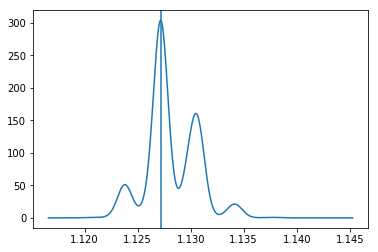

In [7]:
import matplotlib.pyplot as plt

plt.plot(z,PZ)
plt.axvline(z[PZ == max(PZ)])
plt.show()

In [9]:
print(z[PZ == max(PZ)][0])

1.127171447869062
